In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import logsumexp
df = pd.read_csv(f'../data/pilot_0.csv')
n_θ, n_φ = 40, 40
r = 2   # radius of sphere
λ_I_min = 1e-2
θ, φ = np.mgrid[0: np.pi/2 - λ_I_min: n_θ*1j, 0.: np.pi/2: n_φ*1j]
x = r * np.sin(θ) * np.cos(φ)
y = r * np.sin(θ) * np.sin(φ)
z = r * np.cos(θ)
f = open('../data/pilot_heatmap.dat', 'rb')
ℓ = []
for i in range(200):
    ℓ.append(pickle.load(f))
ℓ = np.array(ℓ)
grid_area = np.sin(θ + np.pi / 2 / n_θ)
print(1 / grid_area)
ℓ = np.exp(ℓ - ℓ.max(axis=(1, 2)).reshape(200, 1, 1)) / grid_area
ℓ_bound = ℓ / ℓ.max(axis=(1, 2)).reshape((200, 1, 1))
normalizer = ℓ.sum(axis=(1, 2))
ℓ_geom = ℓ / normalizer.reshape((200, 1, 1))

[[25.47133706 25.47133706 25.47133706 ... 25.47133706 25.47133706
  25.47133706]
 [12.62510366 12.62510366 12.62510366 ... 12.62510366 12.62510366
  12.62510366]
 [ 8.40139295  8.40139295  8.40139295 ...  8.40139295  8.40139295
   8.40139295]
 ...
 [ 1.00129023  1.00129023  1.00129023 ...  1.00129023  1.00129023
   1.00129023]
 [ 1.00005779  1.00005779  1.00005779 ...  1.00005779  1.00005779
   1.00005779]
 [ 1.00042852  1.00042852  1.00042852 ...  1.00042852  1.00042852
   1.00042852]]


In [2]:
def plot_target_heatmap(target, structure, target2='', structure2='', ℓ_mode='geom'):
    s = np.zeros((n_θ, n_φ))
    if target2 == '':
        mask = (df[target] == structure).to_numpy()
    else:
        mask = ((df[target] == structure) & (df[target2] == structure2)).to_numpy()
    for i in range(n_θ):
        for j in range(n_φ):
            s[i, j] = (ℓ_geom if ℓ_mode == 'geom' else ℓ_bound)[:, i, j][mask].mean()
    # s = np.exp(s - s.max())
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(45, 45)
    ax.plot_surface(x,y,z,  rstride=1, cstride=1, facecolors=cm.viridis(s/s.max()), alpha=0.9, linewidth=1) 
    ax.set_xlim([0,2])
    ax.set_ylim([0,2])
    ax.set_zlim([0,2])
    ax.set_xlabel('λ_CLU')
    ax.set_ylabel('λ_GLO')
    ax.set_zlabel('λ_IND')
    ax.set_title(f"{target} == {structure}")
    plt.colorbar(cm.ScalarMappable(cmap=cm.viridis))
    plt.show()

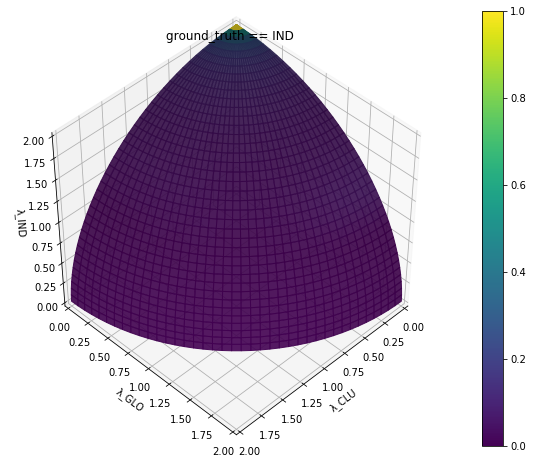

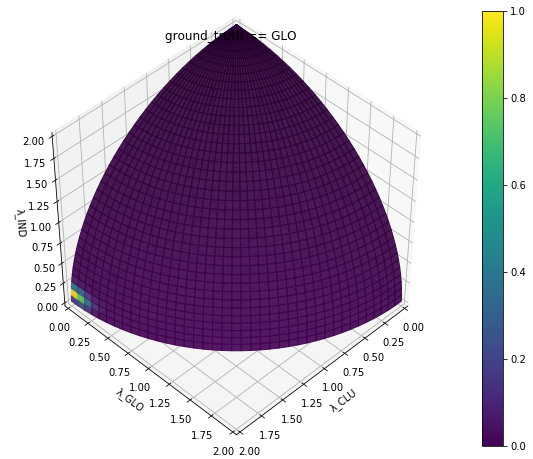

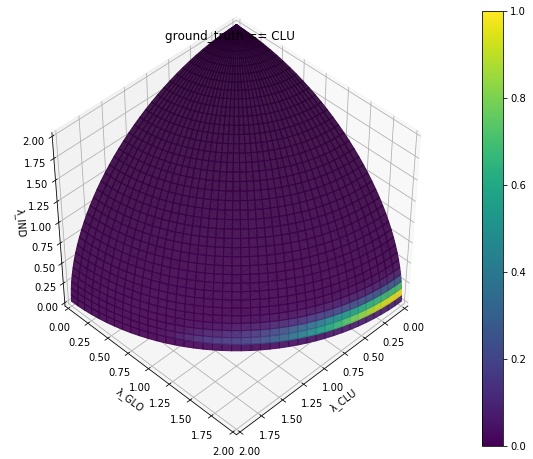

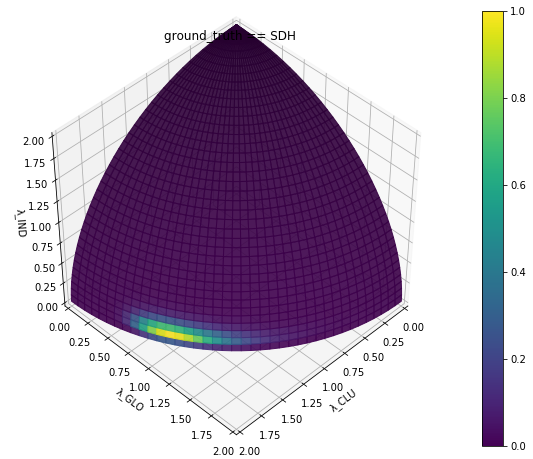

In [173]:
structures = ['IND', 'GLO', 'CLU', 'SDH']
for s in structures:
    plot_target_heatmap('ground_truth', s)

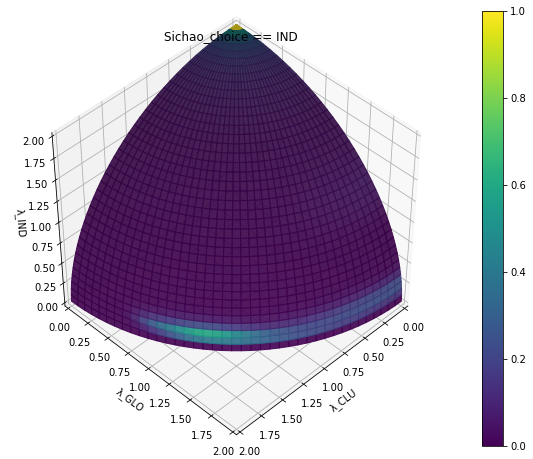

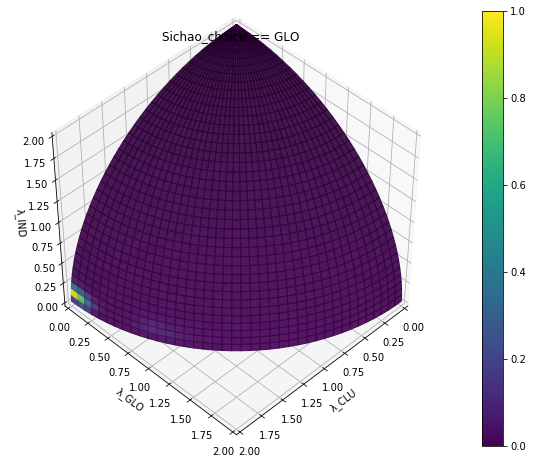

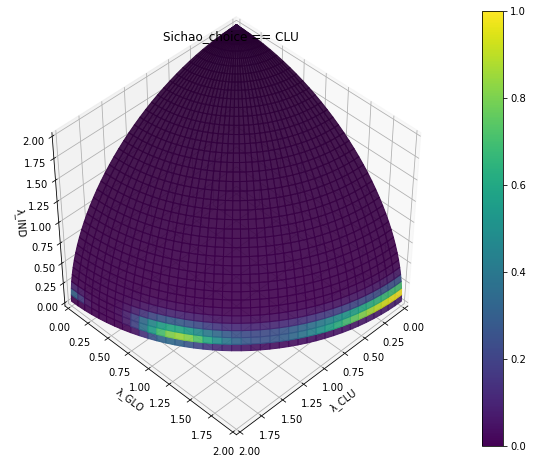

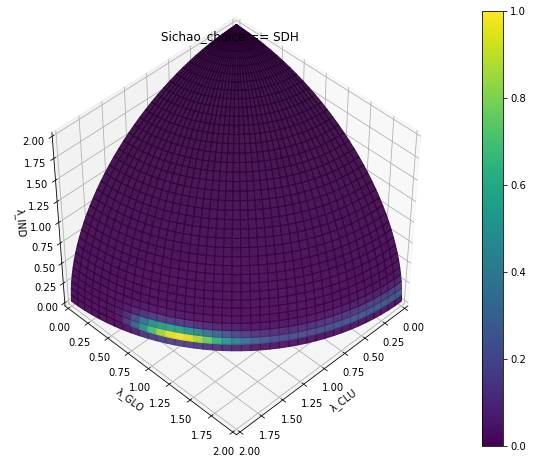

In [174]:
for s in structures:
    plot_target_heatmap('Sichao_choice', s)

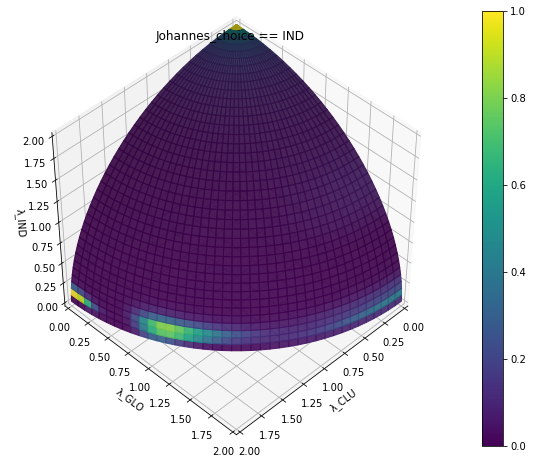

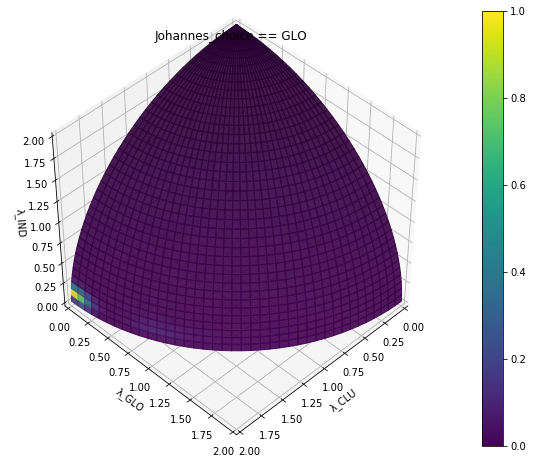

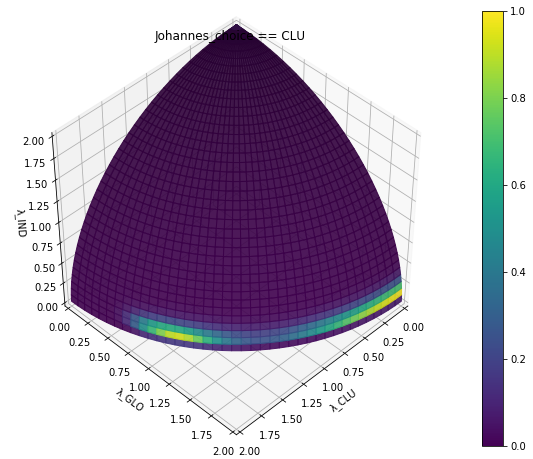

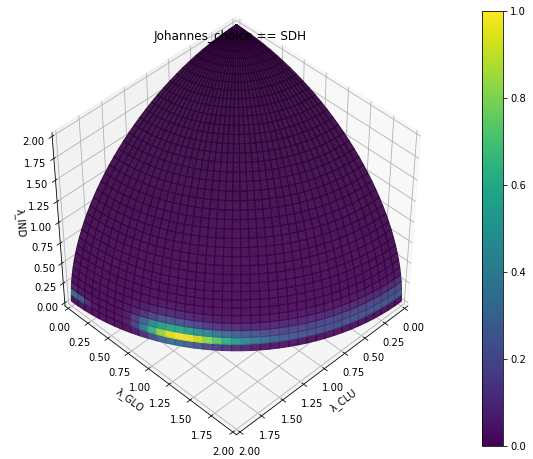

In [175]:
for s in structures:
    plot_target_heatmap('Johannes_choice', s)

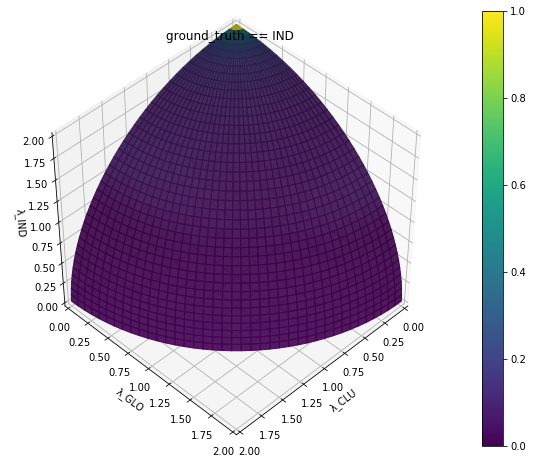

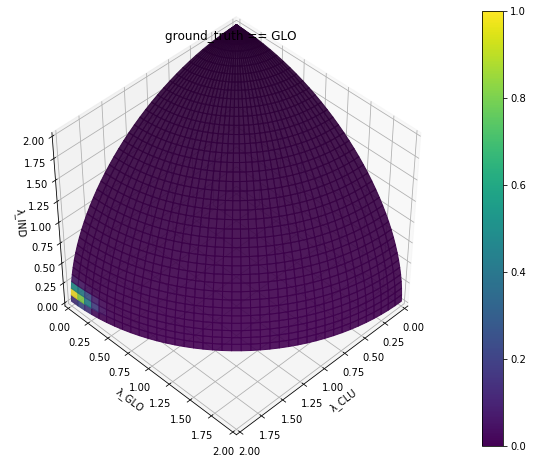

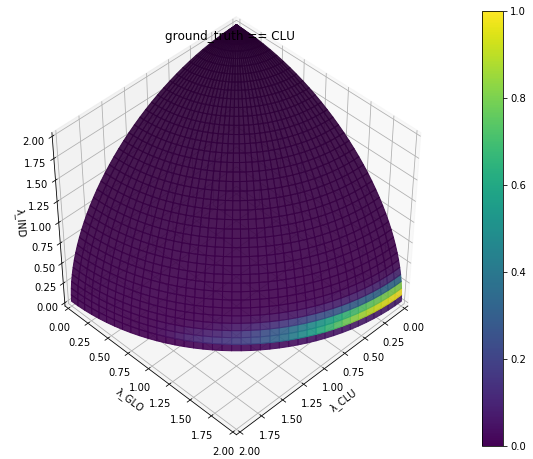

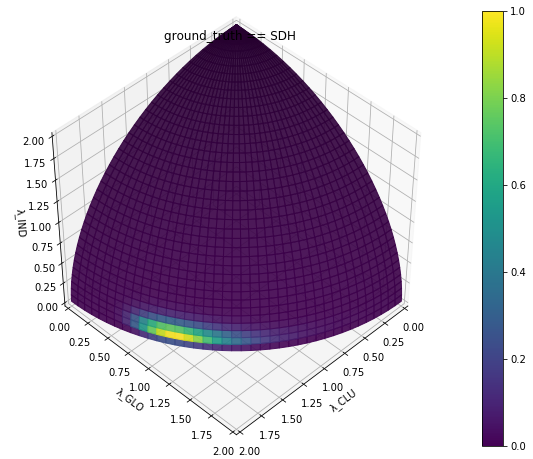

In [176]:
for s in structures:
    plot_target_heatmap('ground_truth', s, ℓ_mode='bound')

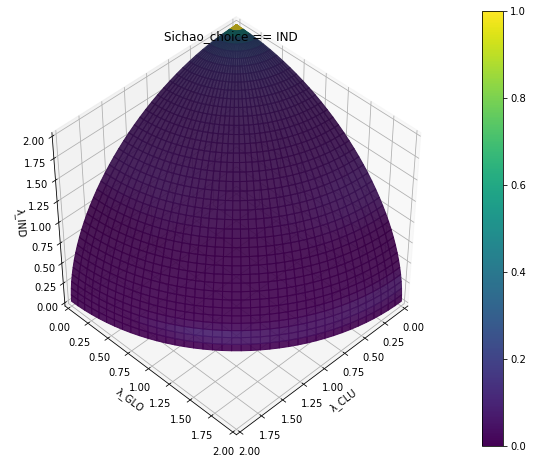

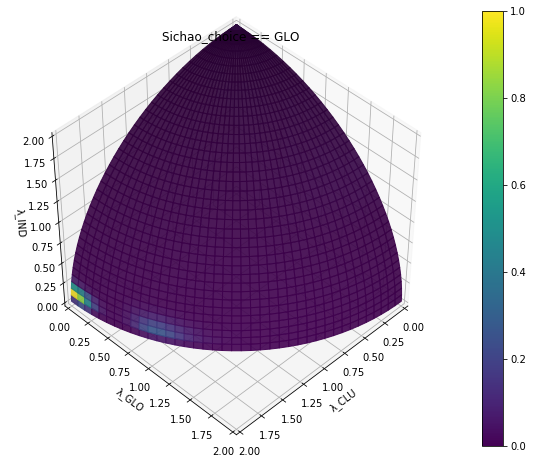

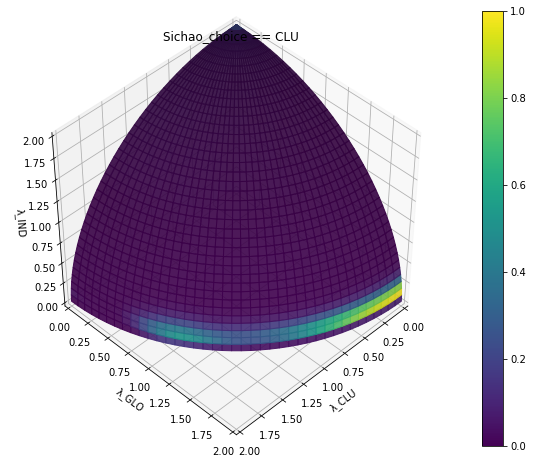

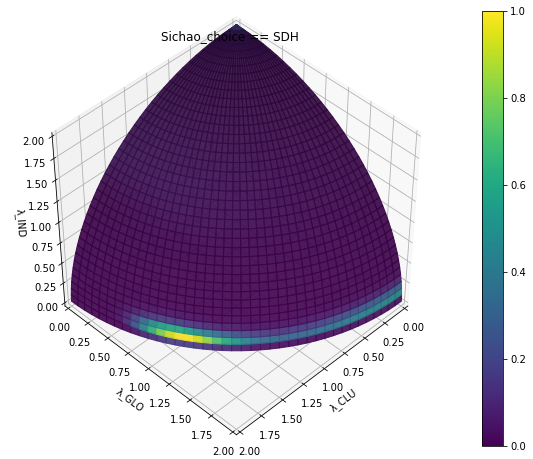

In [177]:
for s in structures:
    plot_target_heatmap('Sichao_choice', s, ℓ_mode='bound')

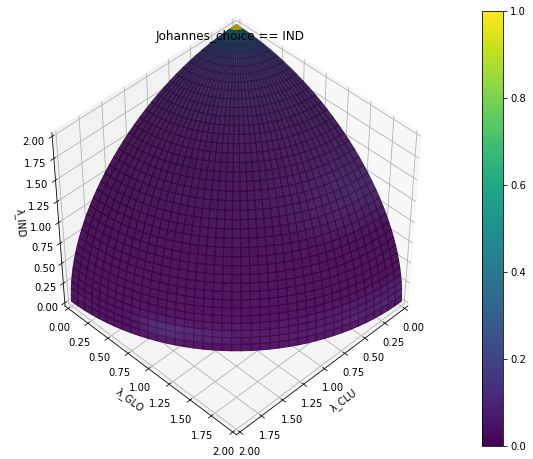

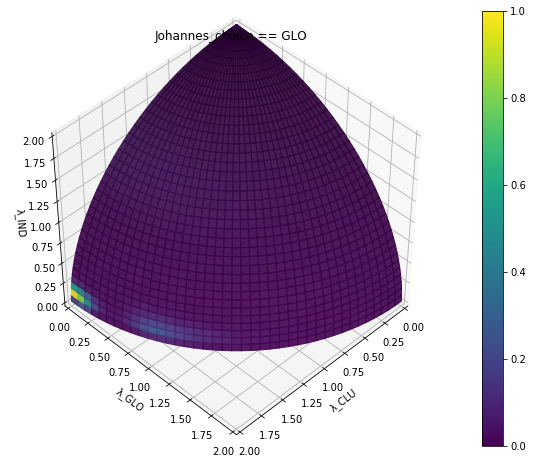

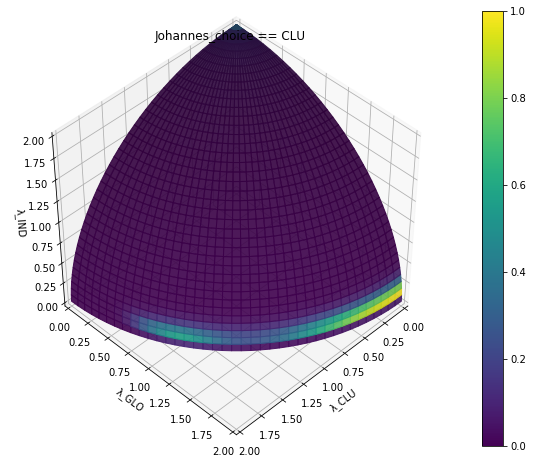

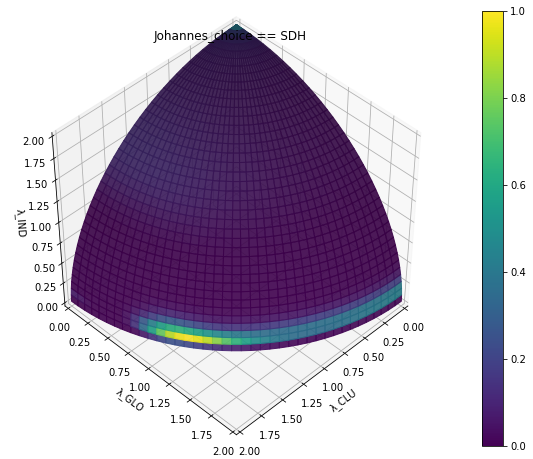

In [178]:
for s in structures:
    plot_target_heatmap('Johannes_choice', s, ℓ_mode='bound')

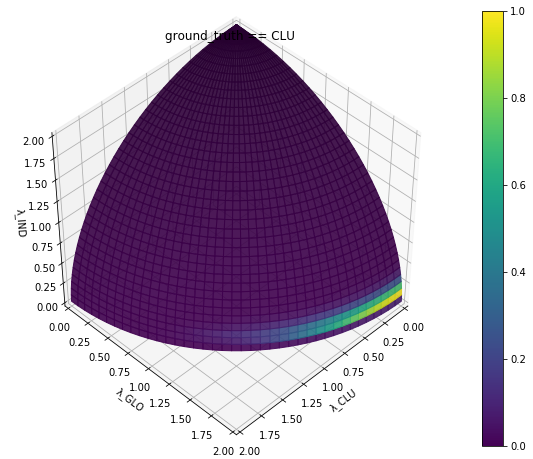

In [5]:
plot_target_heatmap('ground_truth', 'CLU', 'Sichao_choice', 'CLU')

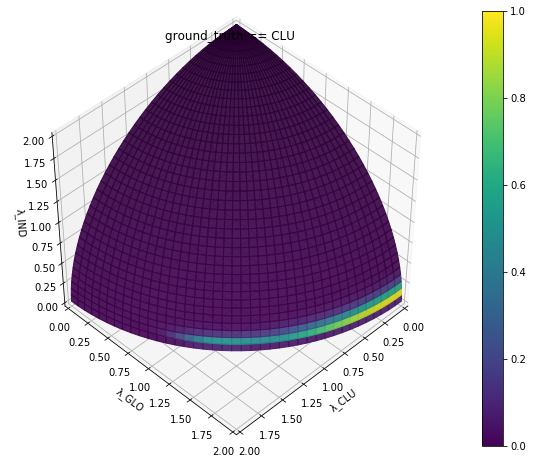

In [8]:
plot_target_heatmap('ground_truth', 'CLU', 'Sichao_choice', 'SDH')

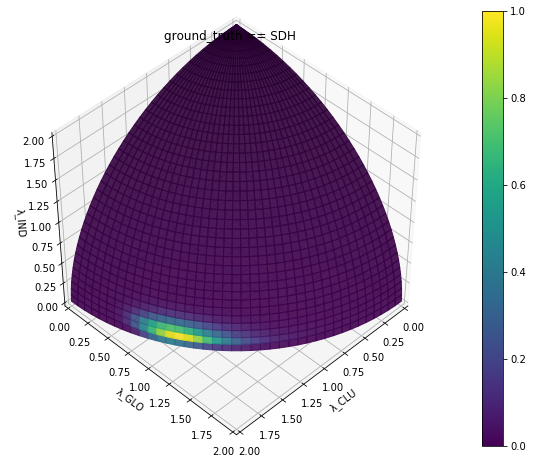

In [6]:
plot_target_heatmap('ground_truth', 'SDH', 'Sichao_choice', 'CLU')

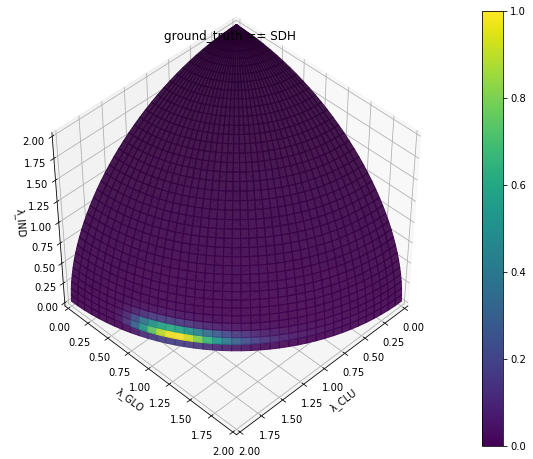

In [5]:
plot_target_heatmap('ground_truth', 'SDH', 'Sichao_choice', 'SDH')

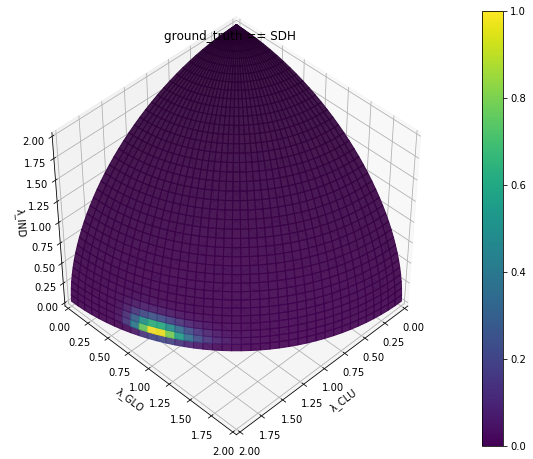

In [6]:
plot_target_heatmap('ground_truth', 'SDH', 'Sichao_choice', 'GLO')

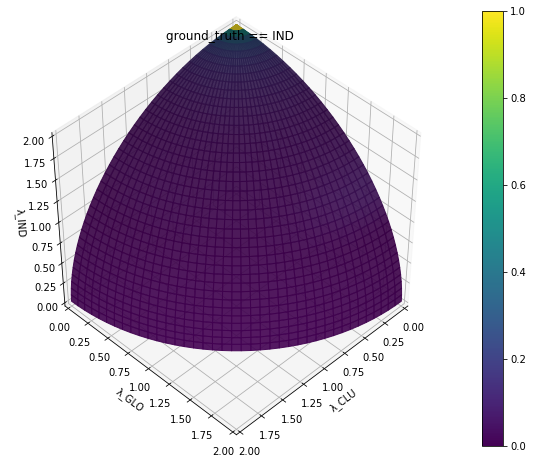

In [3]:
plot_target_heatmap('ground_truth', 'IND', 'Sichao_choice', 'IND')

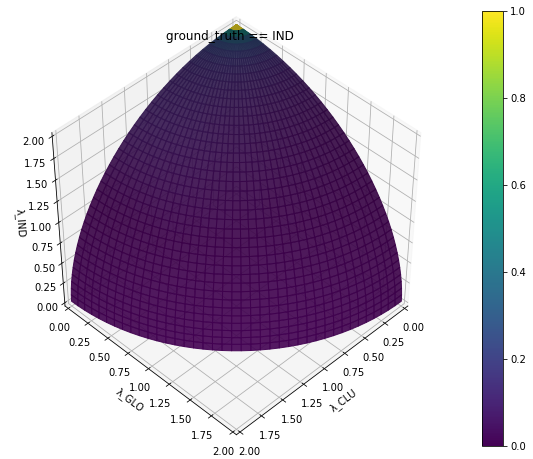

In [4]:
plot_target_heatmap('ground_truth', 'IND', 'Sichao_choice', 'CLU')